Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luka Parisi - Snr:2066677"
COLLABORATORS = "Atma Jyoti Mahapatra - Snr:"

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datascience-for-Economics-Final-Assignment" data-toc-modified-id="Datascience-for-Economics-Final-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datascience for Economics Final Assignment</a></span></li><li><span><a href="#Research-question-(0.5-points)" data-toc-modified-id="Research-question-(0.5-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research question (0.5 points)</a></span></li><li><span><a href="#Motivation-(0.5-points)" data-toc-modified-id="Motivation-(0.5-points)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation (0.5 points)</a></span></li><li><span><a href="#Method-and-data-(1.0-point)" data-toc-modified-id="Method-and-data-(1.0-point)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method and data (1.0 point)</a></span></li><li><span><a href="#Preview-of-the-answers-(0.5-points)" data-toc-modified-id="Preview-of-the-answers-(0.5-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preview of the answers (0.5 points)</a></span></li><li><span><a href="#Main-assumptions-(0.5-points)" data-toc-modified-id="Main-assumptions-(0.5-points)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main assumptions (0.5 points)</a></span></li><li><span><a href="#Python/R-code-(6-points)" data-toc-modified-id="Python/R-code-(6-points)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Python/R code (6 points)</a></span></li><li><span><a href="#Robustness-analysis-(0.5-points)" data-toc-modified-id="Robustness-analysis-(0.5-points)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Robustness analysis (0.5 points)</a></span></li><li><span><a href="#Discussion-and-conclusion-(0.5-points)" data-toc-modified-id="Discussion-and-conclusion-(0.5-points)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion and conclusion (0.5 points)</a></span></li></ul></div>

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# Datascience for Economics Final Assignment

The datascience final assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and SNRs and ANRs of the group members, like so

|Name|SNR|ANR|
|----|---|----|
|j.m. keynes|12345|u6786|
|adam smith|56789|u1234|


See [the webpage](https://janboone.github.io/msc_datascience/#org6548148) for details of what we expect to see in this assignment.

Write readable python/R code and use markdown to explain to us what you are doing in the code and why.


# Research question (0.5 points)

Formulate the research question: what question do you want to answer in this assignment?

**This study will try to determine the relationship between poverty and crime in counties within the United States of America.**

# Motivation (0.5 points)



There have been a multitude of different studies which have tried to disentangle the determinants and casual mechanisms that lead to high crime rates. Yet, the exact mechanism by which crime functions is still quite unknown and is highly effected by the context of the individual setting. Some of the most published research mostly analyzed factors such as poverty, education, family background, race, sex, and other economic and social factors. 

Since we are both economists that are interested in inequailty, we have choosen to analyze how poverty affects crime rates in the United States by county. We choose the United States since it has historically been a rich country with high levels of inequality and the social and health system have often increased these gaps even further. Furthermore, the United States have repeatedly made worldwide news with instances of unexplanable violence and violent crime.     

Our initial idea was to analyze poverty and crime through the lense of each state individually. Instead, we decided it would be smarter to conduct our analysis on the county level, because states themselves can vastly differ by their respective counties.

# Method and data (1.0 point)

Which data do you have to analyze the question and what methods are you using to answer the question?

* explain where your data come from (give a link or the code to download the data if you use an API like [wbdata](https://wbdata.readthedocs.io/en/stable/));
* explain the data cleaning and data normalization steps that you use;
* make sure that the data is in your github repository as well (or explain why this is not possible) so that we can replicate your analysis.
* Motivate why you have decided to use these methods (e.g., neural network) over other methods (e.g., Lasso) in this specific context of your study.
* How is the data representative to the population of interest?

For this analysis we have decided to merge two datasets:
- FBI:
    - The FBI datasets presented arrest information about each county and we decided to use this variable as a proxy variable for crime. Data was available for most counties in the United States and we will explain the weaknesses of this dataset in further detail below.
- County_Complete:
    - This was one of a few datasets where a vast amount of information was available for each county in the United States.

*Both datasets have been provided in our github repository.*

The first challenge, beyond just choosing variables of interest, was to merge the two datasets. Each county in the United States has a unique FIPS code. Unfortunately, the two datasets had different ways of representing this data. As you will see in the code below, we created a new column in the FBI dataset so that the FIPS codes would match between the two datasets.

We believe that it would also be usefull to explain in detail all of the variables that will be in our analysis:


# Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

YOUR ANSWER HERE

# Main assumptions (0.5 points)

What are the main assumptions that you need to answer the question with your data? For example, assumptions about missing data, random sampling, stability of the data generating process. If the aim is causal inference, then also make clear your assumptions about the random assignment of treatment (e.g. plot a DAG to illustrate your view on the causal relations between the variables).

YOUR ANSWER HERE

# Python/R code (6 points)

Give the python/R code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Create as many python/R and markdown cells as you need to explain things well.

If you program mainly in R, you can also use R-studio if you prefer. On jupyterlab, you can switch to an R kernel and combine python and R code in one notebook.


In [2]:
# Importing required modules
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import optimize
import pymc3 as pm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from pickle import dump, load
from sklearn.metrics import confusion_matrix, classification_report
from numpy.random import seed
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
# Bayesian
import arviz as az
import graphviz



/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
#county level data for 2010, subsetting list of variables that can be of use for our analysis
county = pd.read_csv('./Data/County_data/county_complete(1).csv')
county.columns

Index(['fips', 'state', 'name', 'pop2000', 'pop2010', 'pop2011', 'pop2012',
       'pop2013', 'pop2014', 'pop2015',
       ...
       'poverty_under_18_2019', 'two_plus_races_2019',
       'unemployment_rate_2019', 'uninsured_2019',
       'uninsured_65_and_older_2019', 'uninsured_under_19_2019',
       'uninsured_under_6_2019', 'veterans_2019', 'white_2019',
       'white_not_hispanic_2019'],
      dtype='object', length=188)

As noted above, this dataset contains 188 variables, since we are doing an analysis for the year of 2010...

In [4]:
county2010 = county.loc[:,['state','name','fips',
                           'pop2010','hs_grad_2010','poverty_2010','unemployment_rate_2010','median_household_income_2010','metro_2013']]
county2010['year'] = 2010

In [5]:
county2016 = county.loc[:,['state','name','fips',
                           'pop2016','hs_grad_2016','poverty_2016','unemployment_rate_2016','median_household_income_2016','metro_2013']]
county2016['year'] = 2016

In [6]:
crime2010 = pd.read_stata('./Data/FBI_crime_data/ICPSR_33523/DS0001/33523-0001-Data.dta')
crime2010.columns

Index(['STUDYNO', 'EDITION', 'PART', 'IDNO', 'FIPS_ST', 'FIPS_CTY', 'CPOPARST',
       'AG_ARRST', 'JURFLAG', 'COVIND', 'GRNDTOT', 'P1TOT', 'P1VLNT',
       'P1PRPTY', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'OTHASLT', 'FRGYCNT', 'FRAUD', 'EMBEZL', 'STLNPRP',
       'VANDLSM', 'WEAPONS', 'COMVICE', 'SEXOFF', 'DRUGTOT', 'DRGSALE',
       'COCSALE', 'MJSALE', 'SYNSALE', 'OTHSALE', 'DRGPOSS', 'COCPOSS',
       'MJPOSS', 'SYNPOSS', 'OTHPOSS', 'GAMBLE', 'BOOKMKG', 'NUMBERS',
       'OTGAMBL', 'OFAGFAM', 'DUI', 'LIQUOR', 'DRUNK', 'DISORDR', 'VAGRANT',
       'ALLOTHR', 'SUSPICN', 'CURFEW', 'RUNAWAY'],
      dtype='object')

In [7]:
crime2010 = crime2010.loc[:,['FIPS_ST','FIPS_CTY','COVIND','GRNDTOT']]
#using str.zfill to make FIPS code mergable with county dataset
crime2010['FIPS_ST'] = crime2010['FIPS_ST'].astype(str)
crime2010['FIPS_ST'] = crime2010['FIPS_ST'].str.zfill(2)
crime2010['FIPS_CTY'] = crime2010['FIPS_CTY'].astype(str)
crime2010['FIPS_CTY'] = crime2010['FIPS_CTY'].str.zfill(3)
crime2010["fips"] = crime2010["FIPS_ST"] + crime2010["FIPS_CTY"]

In [8]:
crime2016 = pd.read_stata('./Data/FBI_crime_data/ICPSR_37059/DS0001/37059-0001-Data.dta')

In [9]:
crime2016 = crime2016.loc[:,['FIPS_ST','FIPS_CTY','COVIND','GRNDTOT']]
crime2016['FIPS_ST'] = crime2016['FIPS_ST'].astype(str)
crime2016['FIPS_ST'] = crime2016['FIPS_ST'].str.zfill(2)
crime2016['FIPS_CTY'] = crime2016['FIPS_CTY'].astype(str)
crime2016['FIPS_CTY'] = crime2016['FIPS_CTY'].str.zfill(3)
crime2016["fips"] = crime2016["FIPS_ST"] + crime2016["FIPS_CTY"]

As noted above, this dataset contains xxx variables, since we are doing an analysis for the year of 2010...

In [10]:
#adding zeros to first 100 counties
county2010['fips'] = county2010['fips'].astype(str)
county2010['fips'] = county2010['fips'].str.zfill(5)
county2016['fips'] = county2016['fips'].astype(str)
county2016['fips'] = county2016['fips'].str.zfill(5)

In [11]:
county_crime2010 = county2010.merge(crime2010,how='left',left_on=['fips'], right_on=['fips'])
county_crime2016 = county2016.merge(crime2016,how='left',left_on=['fips'], right_on=['fips'])

In [12]:
county_crime2010.describe()

,pop2010,hs_grad_2010,poverty_2010,unemployment_rate_2010,median_household_income_2010,metro_2013,year,COVIND,GRNDTOT
count,3.142000e+03,3142.000000,3142.000000,3139.000000,3142.000000,3139.000000,3142.0,3134.000000,3134.000000
mean,9.826204e+04,83.106811,15.498759,9.366352,44274.120942,0.371137,2010.0,84.368174,3837.173899
std,3.129467e+05,7.358070,6.384852,3.156258,11547.485994,0.483186,0.0,31.177111,12758.806220
min,8.200000e+01,47.900000,0.000000,2.100000,19351.000000,0.000000,2010.0,0.000000,0.000000
25%,1.111450e+04,78.400000,11.000000,7.230000,36956.250000,0.000000,2010.0,90.671150,237.000000
50%,2.587200e+04,84.600000,14.700000,9.230000,42450.000000,0.000000,2010.0,100.000000,819.000000
75%,6.678000e+04,88.600000,19.000000,11.350000,49144.000000,1.000000,2010.0,100.000000,2663.750000
max,9.818605e+06,99.300000,53.500000,28.840000,115574.000000,1.000000,2010.0,100.000000,363182.000000


In [13]:
county_crime2010.rename({'pop2010':'population','hs_grad_2010':'hs_grad','poverty_2010':'poverty', 'unemployment_rate_2010':'unemployment_rate',
                          'median_household_income_2010':'median_hh_income', 'metro_2013':'metro'},inplace=True,axis=1)

In [14]:
county_crime2016.rename({'pop2016':'population','hs_grad_2016':'hs_grad','poverty_2016':'poverty', 'unemployment_rate_2016':'unemployment_rate',
                          'median_household_income_2016':'median_hh_income', 'metro_2013':'metro'},inplace=True,axis=1)

In [15]:
frames = [county_crime2010,county_crime2016]
county_crime = pd.concat(frames)
county_crime.drop(['FIPS_ST','FIPS_CTY'],inplace = True,axis=1)
county_crime.head()

,state,name,fips,population,hs_grad,poverty,unemployment_rate,median_hh_income,metro,year,COVIND,GRNDTOT
0,Alabama,Autauga County,01001,54571.0,85.3,10.6,8.87,53255.0,1.0,2010,98.4525,2710.0
1,Alabama,Baldwin County,01003,182265.0,87.6,12.2,9.99,50147.0,1.0,2010,100.0000,8503.0
2,Alabama,Barbour County,01005,27457.0,71.9,25.0,12.35,33219.0,0.0,2010,98.9839,707.0
3,Alabama,Bibb County,01007,22915.0,74.5,12.6,11.42,41770.0,1.0,2010,100.0000,780.0
4,Alabama,Blount County,01009,57322.0,74.7,13.4,9.82,45549.0,1.0,2010,99.2813,1979.0


In [16]:
county_crime.describe()

,population,hs_grad,poverty,unemployment_rate,median_hh_income,metro,year,COVIND,GRNDTOT
count,6.281000e+03,6282.000000,6281.000000,6278.000000,6281.000000,6278.000000,6284.000000,6275.000000,6275.000000
mean,1.006431e+05,84.461923,15.683633,7.298308,46902.375577,0.371137,2013.000000,84.886416,3435.668685
std,3.222300e+05,7.092274,6.327255,3.319982,12512.127597,0.483148,3.000239,31.089238,11074.156621
min,8.200000e+01,47.900000,0.000000,1.670000,19351.000000,0.000000,2010.000000,0.000000,0.000000
25%,1.106400e+04,80.000000,11.200000,4.690000,38646.000000,0.000000,2010.000000,91.947750,221.500000
50%,2.583300e+04,85.900000,14.800000,6.585000,44785.000000,0.000000,2013.000000,100.000000,779.000000
75%,6.702300e+04,89.800000,19.000000,9.480000,52520.000000,1.000000,2016.000000,100.000000,2461.500000
max,1.015056e+07,99.300000,53.500000,28.840000,134609.000000,1.000000,2016.000000,100.000000,363182.000000


#### Creating dependent variable of interest:
Arrest rate – An arrest rate describes the number of arrests made by law enforcement agencies per 
100,000 total population. An arrest rate is calculated by dividing the number of reported arrests by the desired population. The result is multiplied by 100,000. We will use this variable as our dependent variable and proxy variable for crime rate.

In [17]:
county_crime['arrest_rate'] =  (county_crime.GRNDTOT/county_crime.population)*100000

In [18]:
county_crime = county_crime.sort_values(['fips','year'])
county_crime.set_index(['fips','year'],inplace=True)
#df = df.unstack()

In [19]:
county_crime.head()

state            name  population  hs_grad  poverty  \
fips  year                                                          
01001 2010  Alabama  Autauga County     54571.0     85.3     10.6   
      2016  Alabama  Autauga County     55278.0     87.6     13.5   
01003 2010  Alabama  Baldwin County    182265.0     87.6     12.2   
      2016  Alabama  Baldwin County    207509.0     90.0     11.7   
01005 2010  Alabama  Barbour County     27457.0     71.9     25.0   

            unemployment_rate  median_hh_income  metro    COVIND  GRNDTOT  \
fips  year                                                                  
01001 2010               8.87           53255.0    1.0   98.4525   2710.0   
      2016               5.11           54487.0    1.0   98.5035   2796.0   
01003 2010               9.99           50147.0    1.0  100.0000   8503.0   
      2016               5.35           56460.0    1.0   96.2812  14765.0   
01005 2010              12.35           33219.0    0.0   98.9839    707.0   

            arrest_rate  
fips  year               
01001 2010  4966.007586  
      2016  5058.070118  
01003 2010  4665.185307  
      2016  7115.354033  
01005 2010  2574.935353

In [20]:
#defining a function analysing the dataset in terms of missing values and type of columns
def Analysis(data):
    print("Analysing")
    print(data.info())
    #calculating the share of missing values
    missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
    missing.columns=['Count', '%']
    missing = missing.sort_values(by='Count', ascending=False)
    print(missing)
    df=missing.iloc[0:5,0]

#analysing the dataset
Analysis(county_crime)

Analysing
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6284 entries, ('01001', 2010) to ('56045', 2016)
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              6284 non-null   object 
 1   name               6284 non-null   object 
 2   population         6281 non-null   float64
 3   hs_grad            6282 non-null   float64
 4   poverty            6281 non-null   float64
 5   unemployment_rate  6278 non-null   float64
 6   median_hh_income   6281 non-null   float64
 7   metro              6278 non-null   float64
 8   COVIND             6275 non-null   float64
 9   GRNDTOT            6275 non-null   float64
 10  arrest_rate        6272 non-null   float64
dtypes: float64(9), object(2)
memory usage: 647.8+ KB
None
                   Count         %
arrest_rate           12  0.190961
COVIND                 9  0.143221
GRNDTOT                9  0.143221
unemployment_rate      6  0.095481


In [21]:
#drop small number of missing values
county_crime = county_crime.dropna()

#### Dealing with missing values
The Coverage Indicator
variable represents the proportion of county data that is reported
for a given year. The indicator ranges from 0 to 100. A value of 0
indicates that no data for the county were reported and all data
have been imputed. A value of 100 indicates that all ORIs in the
county reported for all 12 months in the year. 

In this data collection, zeroes may represent both true zeroes
or missing data, and it is possible to distinguish between the two.
In the arrest files (Parts 1-3 and 5-7), the coverage indictor alone
does not indicate whether or not zeroes are true or missing values. A
county can have a coverage indicator of zero, but still contain
arrest data. ICPSR can estimate arrest data for a county that did
not report any arrests based on data for other counties of comparable
population size in the same state that did report 12 months of data. 

Besides missing values, the official FBI documentation also noted that:No arrest data were provided for Florida. Limited arrest data were available for Illinois. Limited crimes reported data were available for Alaska, Kentucky, Mississippi, Montana, and South Dakota. Because of this we will drop these States from the analysis.

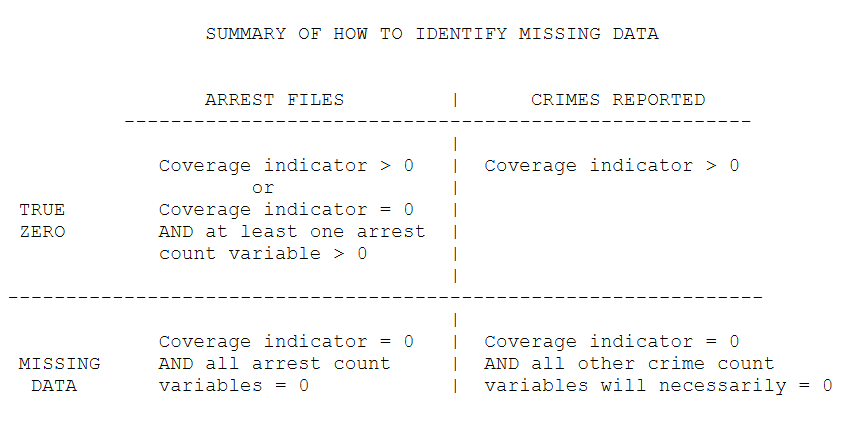

In [22]:
county_crime = county_crime.loc[(county_crime['COVIND'] != 0) & (county_crime['GRNDTOT'] != 0)]

In [23]:
county_crime.describe()

,population,hs_grad,poverty,unemployment_rate,median_hh_income,metro,COVIND,GRNDTOT,arrest_rate
count,5.677000e+03,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000
mean,1.000435e+05,84.410534,15.623604,7.264136,47069.865774,0.374494,93.374274,3764.673771,3596.022767
std,3.208540e+05,7.071781,6.219363,3.334042,12662.622885,0.484035,16.433913,11581.196732,2180.687811
min,8.200000e+01,47.900000,0.000000,1.670000,19906.000000,0.000000,1.897600,1.000000,19.703139
25%,1.160200e+04,80.000000,11.100000,4.650000,38702.000000,0.000000,96.324000,314.000000,2191.351986
50%,2.683500e+04,85.800000,14.800000,6.550000,44785.000000,0.000000,100.000000,931.000000,3266.639445
75%,6.875600e+04,89.800000,19.000000,9.380000,52763.000000,1.000000,100.000000,2786.000000,4621.619987
max,1.015056e+07,99.300000,48.000000,28.840000,134609.000000,1.000000,100.000000,363182.000000,63221.153846


In [24]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(county_crime['arrest_rate'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [8278.185537239802, 8294.046193182301, 8294.793376100253, 8304.7467092142, 8315.764816116187, 8347.654012393898, 8350.550964187329, 8366.709211742442, 8368.376120633238, 8376.237623762378, 8380.81603435934, 8387.143582674309, 8395.242451967064, 8417.263571246773, 8447.73648394414, 8453.38821556521, 8472.10541070928, 8476.947656006278, 8489.139693356048, 8493.68147593677, 8498.375130296155, 8500.718689637279, 8532.6884877796, 8533.572655511165, 8547.436539424521, 8551.894309361025, 8553.785015779016, 8566.764094056929, 8568.69667549279, 8586.89815643458, 8605.472197705209, 8605.961282392707, 8615.171697950003, 8634.208324294172, 8647.84035570612, 8660.015721694355, 8660.536779324057, 8700.227531285553, 8718.10495848884, 8748.547824964502, 8759.013665473249, 8766.071231114105, 8781.39534883721, 8786.819770344484, 8802.103168265745, 8811.789750493066, 8832.807570977919, 8837.537484565179, 8837.811589511168, 8860.71629668811, 8869.839048285514, 8885.29886914378, 

In [25]:
#drop outliers, we are using min(sample_outliers) because we only have outliers on the right of our distribution
county_crime = county_crime.loc[(county_crime['arrest_rate'] > 100) & (county_crime['arrest_rate'] < min(sample_outliers))]

In [26]:
#county_crime.drop(['COVIND','Total_arrests'],axis=1,inplace=True)

In [27]:
county_crime.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5523 entries, ('01001', 2010) to ('56045', 2016)
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              5523 non-null   object 
 1   name               5523 non-null   object 
 2   population         5523 non-null   float64
 3   hs_grad            5523 non-null   float64
 4   poverty            5523 non-null   float64
 5   unemployment_rate  5523 non-null   float64
 6   median_hh_income   5523 non-null   float64
 7   metro              5523 non-null   float64
 8   COVIND             5523 non-null   float64
 9   GRNDTOT            5523 non-null   float64
 10  arrest_rate        5523 non-null   float64
dtypes: float64(9), object(2)
memory usage: 580.1+ KB


<AxesSubplot:xlabel='poverty', ylabel='arrest_rate'>

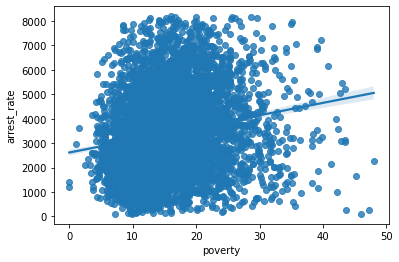

In [28]:
sns.regplot(x=county_crime['poverty'], y=county_crime['arrest_rate'])

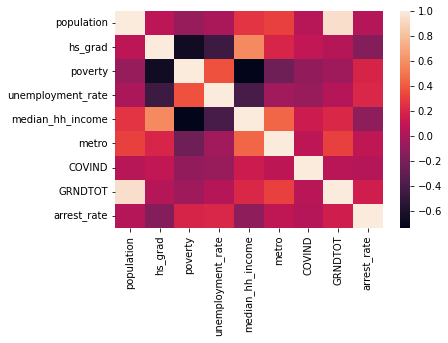

In [29]:
import seaborn as sn
corrMatrix = county_crime.corr()
sn.heatmap(corrMatrix)
plt.show()

In [30]:
y = county_crime.arrest_rate
x = county_crime.poverty
results_fork_incorrect = smf.ols('y ~ x', data=county_crime).fit()
results_fork_incorrect.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     202.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.42e-45
Time:                        13:48:47   Log-Likelihood:                -48716.
No. Observations:                5523   AIC:                         9.744e+04
Df Residuals:                    5521   BIC:                         9.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2617.4309     59.756     43.802      0.000    2500.285    2734.577
x             50.8324      3.571     14.236      0.000      43.833      57.832
==============================================================================
Omnibus:                      158.050   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.079
Skew:                           0.416   Prob(JB):                     3.18e-37
Kurtosis:                       2.806   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
def standardize(x):
    return (x-x.mean())/x.std()
arrest_rate = standardize(county_crime['arrest_rate'])
poverty = standardize(county_crime['poverty'])
metro = standardize(county_crime['metro'])
#lpopulation = standardize(county_crime['l_population'])
#population = standardize(county_crime['population'])
#total_arrests = standardize(county_crime['Total_arrests'])

In [ ]:
with pm.Model() as normal:
    constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
    σ_prior = 0.1
    b_poverty = pm.Normal('b_poverty', mu = 0, sd = σ_prior)
    #b_lpopulation = pm.Normal('b_lpopulation', mu = 0, sd = σ_prior)
    #b_over_65 = pm.Normal('b_over_65', mu = 0, sd = σ_prior)
    #b_black = pm.normal(b_black, mu = 0, sd = σ_prior)
    #b_population = pm.Normal('b_population', mu = 0, sd = σ_prior)
    
    μ = constant + b_poverty
    σ = pm.HalfNormal('σ', 1)

    arrest_rate = pm.Normal('arrest_rate', μ, σ, observed=arrest_rate)
    trace_normal = pm.sample(1500, tune=750)

/tmp/ipykernel_15148/599387018.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_normal = pm.sample(1500, tune=750)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_poverty, constant]


Sampling 4 chains for 750 tune and 1_500 draw iterations (3_000 + 6_000 draws total) took 96 seconds.
/tmp/tmp5aaxqzrj/source.c:1:10: fatal error: cblas.h: No such file or directory
    1 | #include <cblas.h>
      |          ^~~~~~~~~
compilation terminated.


In [ ]:
with normal:
    ppc_normal = pm.sample_posterior_predictive(trace_normal, var_names = ['arrest_rate'])

In [ ]:
data_posterior_normal = az.from_pymc3(trace_normal, posterior_predictive = ppc_normal)

In [ ]:
variables_arrest = ['b_poverty']
az.summary(data_posterior_normal.posterior,variables_arrest)

In [ ]:
with normal:
    pm.plot_trace(trace_normal)

# Robustness analysis (0.5 points)

How robust are your results? Think of things like:

* outliers in the data
* different specification of regression, neural network etc.
* split of data in train, validation and test data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).



YOUR ANSWER HERE